In [26]:
import pandas as pd
import numpy as np

First, we get the training and test data from CSV files:

In [27]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

### DATA ANALYSIS

In [28]:
# print the first 5 training data instances to get a feature overview
print(train_data.head())

   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5              1               1.0   22   25   2

FEATURE DISTRIBUTION

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
numerical_features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
                      'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
                      'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
                      'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

# Create subplots
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 4, i)
    sns.histplot(train_data[train_data['smoking'] == 0][feature], bins=30, kde=True, kde_kws={'bw_method': 0.5}, color='blue', label='Non-smokers', stat='density', common_norm=False)
    sns.histplot(train_data[train_data['smoking'] == 1][feature], bins=30, kde=True, kde_kws={'bw_method': 0.5}, color='orange', label='Smokers', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()



CORRELATION

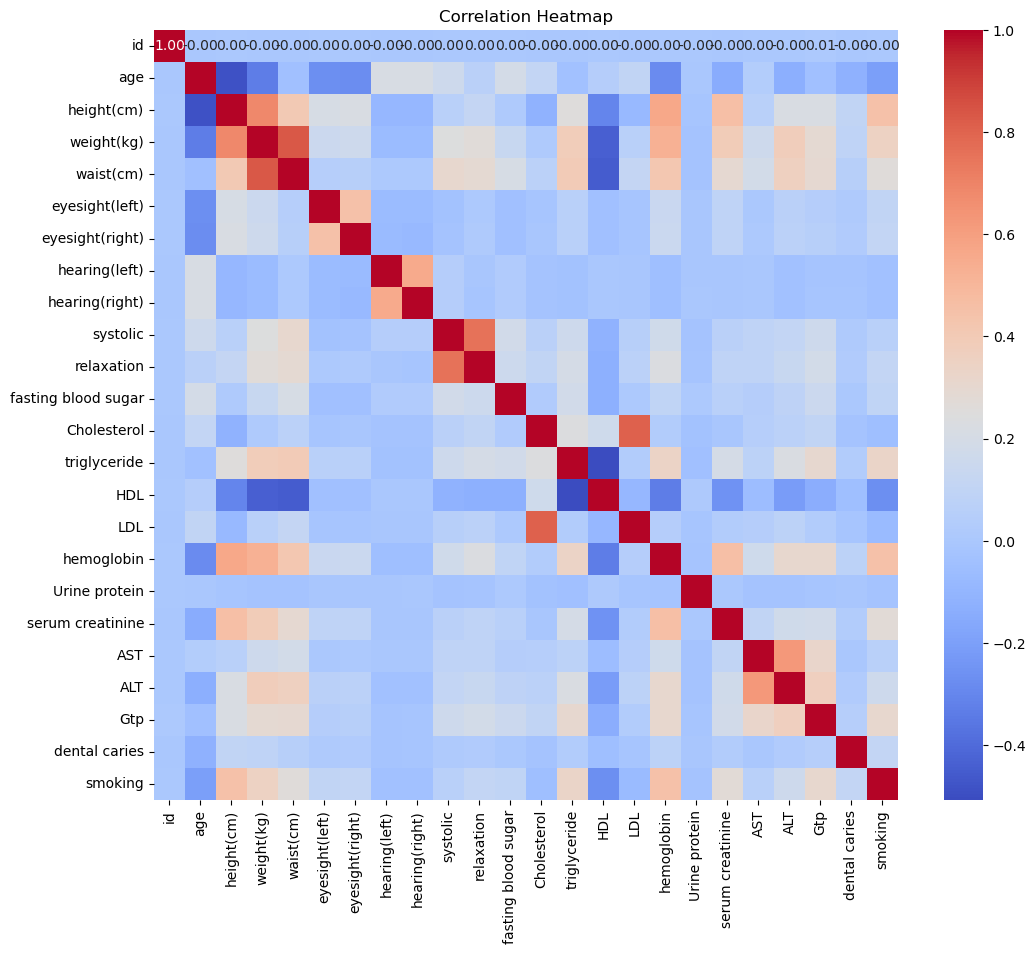

In [31]:
# correlation matrix
correlation_matrix = train_data.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Looking at the provided correlation matrix, some notable patterns emerge. The variable "smoking" shows positive correlations with several health-related features, such as "height," "weight," "waist," "systolic blood pressure," and "hemoglobin." This suggests that individuals who smoke may exhibit characteristics like higher weight, larger waist circumference, and higher blood pressure.

Conversely, there are negative correlations between "smoking" and certain visual acuity measures like "eyesight (left)" and "eyesight (right)." This implies that smoking might have a negative impact on eyesight. Additionally, there are negative correlations between "smoking" and some blood lipid profiles like "HDL" (high-density lipoprotein) and "LDL" (low-density lipoprotein), indicating potential associations between smoking and lipid metabolism.

It's important to note that correlation does not imply causation, and further statistical analysis or domain-specific knowledge is needed to establish causal relationships between variables.

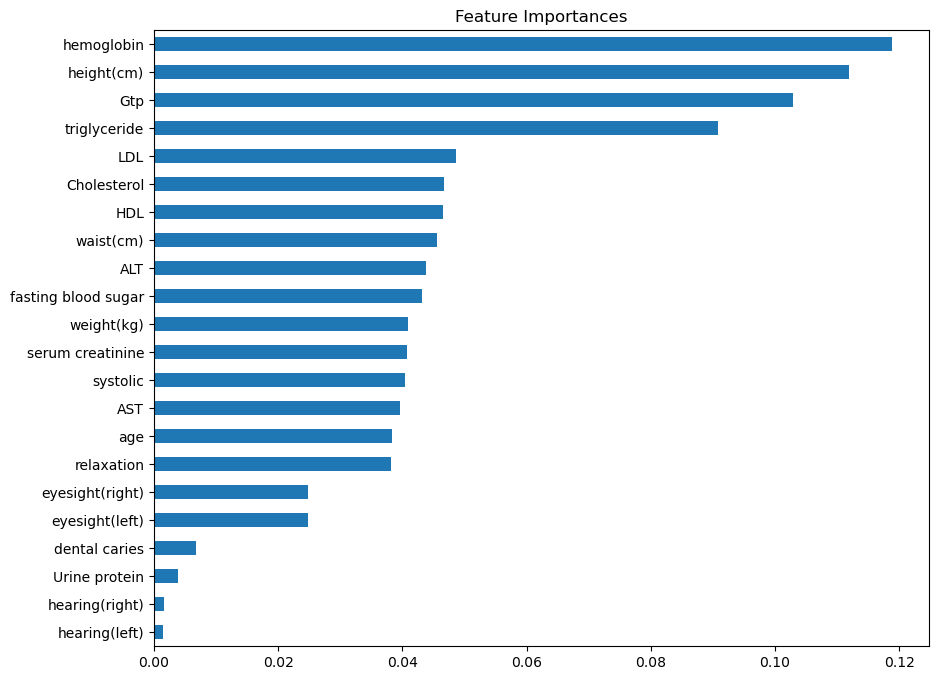

In [32]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier for feature importance
X = train_data.drop(['id', 'smoking'], axis=1)
y = train_data['smoking']

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

feature_importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importances')
plt.savefig("feature_importances.svg", transparent=True)
plt.show()


The feature importances obtained from our RandomForestClassifier offer valuable insights into the factors that contribute most to predicting smoking status in our dataset.

**Hemoglobin** (13.48%):

Hemoglobin levels have the highest importance, indicating an association with smoking status. Elevated or reduced hemoglobin levels may be linked to smoking-related health effects, such as changes in blood oxygen levels.

**Gtp** (9.82%):

Gamma-glutamyl transferase (Gtp) levels also carry significant importance. Elevated Gtp levels are often associated with liver dysfunction, and this importance suggests a potential link between liver health and smoking in our dataset.

**Height** (10.42%) and **Weight** (4.00%):

Both height and weight contribute to predicting smoking status, suggesting a connection between body mass index (BMI) and smoking habits. This aligns with existing literature indicating correlations between smoking and weight-related factors.

**Triglyceride** (8.20%):

Triglyceride levels, a marker of lipid metabolism, are relevant in predicting smoking status. Elevated triglycerides are commonly linked to an increased risk of cardiovascular issues. Therefore, the notable importance of triglycerides in our model implies that smoking might influence the lipid profiles of individuals in our dataset, potentially contributing to cardiovascular health risks.

Age (3.89%):

**Age** contributes modestly to predicting smoking status. This is consistent with the understanding that smoking habits often vary across different age groups.

**Eyesight** (2.47% to 1.55%):

Eyesight measurements have relatively lower importance. This suggests that while sensory health is considered, it may not be as influential in predicting smoking status compared to other factors.

**Urine Protein (0.39%), Hearing (Left and Right - 0.15%):**

Urine protein and hearing measurements have minimal importance, indicating a weaker association with smoking status in our dataset.

Delving into these feature importances not only helps us pinpoint the key factors influencing smoking status prediction but also lays the groundwork for understanding how specific health indicators are affected by smoking in our study population. This valuable insight provides a foundation for targeted interventions and further investigations. Moreover, recognizing these influential features enhances our capabilities to tackle the Kaggle task successfully, where the goal is binary classification to predict a patient's smoking status based on various health indicators.

Exploratory Data Analysis: another way of plotting the features (we'll get rid of one)

---



In [ ]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
num_subplots = len(numerical_features)

plt.figure(figsize=(18, 4 * num_subplots))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_subplots, 3, i)
    sns.boxplot(x='smoking', y=feature, data=train_data)
    plt.title(f'Boxplot of {feature} by Smoking Status')
plt.tight_layout()
plt.show()

In [ ]:
total = len(train_data)
smoking_percentages = train_data['smoking'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_percentages.index, y=smoking_percentages.values)
plt.title('Distribution of Smoking Status')
plt.ylabel('Percentage')

for i, value in enumerate(smoking_percentages):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

There is no missing values:

In [36]:
missing_values = train_data.isnull().sum()

missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Series([], dtype: int64)


Preparing data:

In [37]:
X = train_data.drop(['id', 'smoking'], axis=1)
y = train_data['smoking']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



BASELINE PREDICITON:

In [38]:
smoking_distribution = train_data['smoking'].value_counts()
majority_class = smoking_distribution.idxmax()
baseline_prediction = pd.DataFrame({'id': test_data['id'], 'smoking': majority_class})
baseline_prediction.to_csv('submissions/baseline.csv', index=False)

**BASELINE**: Score: 0.5, Public score: 0.5

Training the model, evaluating solution:

In [39]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


test_predictions = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'ROC AUC Score on the test set: {roc_auc:.4f}')

ROC AUC Score on the test set: 0.8530


Making prediction and saving it to a csv file:

**RANDOM FOREST**: Score: 0.85774, Public score: 0.85829



In [40]:
# predictions on the actual test set
X_test_final = test_data.drop(['id'], axis=1)
X_test_final_scaled = scaler.transform(X_test_final)
final_predictions = model.predict_proba(X_test_final_scaled)[:, 1]

# submission
submission = pd.DataFrame({'id': test_data['id'], 'smoking': final_predictions})
submission.to_csv('submissions/submission.csv', index=False)


In [this](https://www.kaggle.com/code/alexryzhkov/lb-0-88048-simple-smoking-ensemble) solution, 3 different kaggle submissions are used ans an ensemble. Similarly, we can use this approach. Combining other people's solutions.

### PCA :

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_scaled_pca, y_train)

test_predictions_pca = model_pca.predict_proba(X_test_scaled_pca)[:, 1]


roc_auc_pca = roc_auc_score(y_test, test_predictions_pca)
print(f'ROC AUC Score on the test set with PCA: {roc_auc_pca:.4f}')


X_test_final_scaled_pca = pca.transform(X_test_final_scaled)
final_predictions_with_pca = model_pca.predict_proba(X_test_final_scaled_pca)[:, 1]

submission_pca = pd.DataFrame({'id': test_data['id'], 'smoking': final_predictions_with_pca})

submission_pca.to_csv('submissions/submission_pca.csv', index=False)

ROC AUC Score on the test set with PCA: 0.7793


**PCA**: Score: 0.75259, Public score: 0.75202




### LASSO:

In [42]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

test_predictions_lasso = lasso_model.predict(X_test_scaled)

roc_auc_lasso = roc_auc_score(y_test, test_predictions_lasso)
print(f'ROC AUC Score on the test set with Lasso Regression: {roc_auc_lasso:.4f}')


ROC AUC Score on the test set with Lasso Regression: 0.8255


### LASSO + RF :

In [43]:
from sklearn.linear_model import LogisticRegression

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict_proba(X_test_scaled)[:, 1]

X_ensemble = np.column_stack((lasso_predictions, rf_predictions))
ensemble_model = LogisticRegression()
ensemble_model.fit(X_ensemble, y_test)
ensemble_predictions = ensemble_model.predict_proba(X_ensemble)[:, 1]

roc_auc_ensemble = roc_auc_score(y_test, ensemble_predictions)
print(f'ROC AUC Score on the test set with Ensemble Model: {roc_auc_ensemble:.4f}')


ROC AUC Score on the test set with Ensemble Model: 0.8535


In [44]:
X_test_final = test_data.drop(['id'], axis=1)
X_test_final_scaled = scaler.transform(X_test_final)

lasso_final_predictions = lasso_model.predict(X_test_final_scaled)
rf_final_predictions = rf_model.predict_proba(X_test_final_scaled)[:, 1]

X_ensemble_final = np.column_stack((lasso_final_predictions, rf_final_predictions))
ensemble_final_predictions = ensemble_model.predict_proba(X_ensemble_final)[:, 1]

submission_ensemble = pd.DataFrame({'id': test_data['id'], 'smoking': ensemble_final_predictions})

submission_ensemble.to_csv('submissions/submission_ensemble.csv', index=False)

**RF + LASSO**: Score: 0.85801, Public score: 0.8586





### OTHER PEOPLE'S SUBMISSION IN AN ENSEMBLE

The following 3 submissions are from the [code section](https://www.kaggle.com/competitions/playground-series-s3e24/code?sortBy=scoreDescending) of the Kaggle competition, sorted by public score.

In [45]:
submission1 = pd.read_csv('top_submissions/submission_1.csv')
submission2 = pd.read_csv('top_submissions/submission_2.csv')
submission3 = pd.read_csv('top_submissions/submission_3.csv')

ensemble_predictions = (submission1['smoking'] + submission2['smoking'] + submission3['smoking']) / 3
ensemble_submission = pd.DataFrame({'id': submission1['id'], 'smoking': ensemble_predictions})

ensemble_submission.to_csv('submissions/participant_ensemble_submission.csv', index=False)

OTHER PEOPLES SOLUTIONS: Score: 0.87879, Public score: 0.88097

**if we keep into account the scores...**

In [46]:
score1 = 0.9
score2 = 0.3
score3 = 0.6

# FOR PRIVATE SCORE 0.87882 (our best so far):
# score1 = 0.9
# score2 = 0.7
# score3 = 0.5


weight1 = score1
weight2 = score2
weight3 = score3

ensemble_predictions = (
    weight1 * submission1['smoking'] +
    weight2 * submission2['smoking'] +
    weight3 * submission3['smoking']
) / (weight1 + weight2 + weight3)

ensemble_submission = pd.DataFrame({'id': submission1['id'], 'smoking': ensemble_predictions})
ensemble_submission.to_csv('submissions/weighted_ensemble_submission.csv', index=False)

OTHER PEOPLES SOLUTIONS: Score: 0.87882, Public score: 0.88099

In [ ]:
submission_ensemble = pd.read_csv('weighted_ensemble_submission.csv')

noise_factor = 0.008
random_noise = np.random.uniform(-noise_factor, noise_factor, size=len(submission_ensemble))
submission_ensemble['smoking'] += random_noise

submission_ensemble['smoking'] = np.clip(submission_ensemble['smoking'], 0, 1)
submission_ensemble.to_csv('submissions/noisy_weighted_ensemble_submission.csv', index=False)


We experimented further with this approach, taking 9 out of the top 10 submission from the competition's code section. From those, we tried different combinations of computing the average and median predictions for each instance. We did it based on our theory that all of the top 10 prediction tables are nearly perfect that and the median/average prediction of an instance is rather correct than an outer value.

In [ ]:
# Load the CSV file
final_predictions1 = pd.read_csv('top_submissions/submission_1.csv')
final_predictions1 = pd.DataFrame(final_predictions1)['smoking'].to_numpy()
final_predictions2 = pd.read_csv('top_submissions/submission_2.csv')
final_predictions2 = pd.DataFrame(final_predictions2)['smoking'].to_numpy()
final_predictions3 = pd.read_csv('top_submissions/submission_3.csv')
final_predictions3 = pd.DataFrame(final_predictions3)['smoking'].to_numpy()
final_predictions4 = pd.read_csv('top_submissions/submission_4.csv')
final_predictions4 = pd.DataFrame(final_predictions4)['smoking'].to_numpy()
final_predictions5 = pd.read_csv('top_submissions/submission_5.csv')
final_predictions5 = pd.DataFrame(final_predictions5)['smoking'].to_numpy()
final_predictions6 = pd.read_csv('top_submissions/submission_6.csv')
final_predictions6 = pd.DataFrame(final_predictions6)['smoking'].to_numpy()
final_predictions7 = pd.read_csv('top_submissions/submission_7.csv')
final_predictions7 = pd.DataFrame(final_predictions7)['smoking'].to_numpy()
final_predictions9 = pd.read_csv('top_submissions/submission_9.csv')
final_predictions9 = pd.DataFrame(final_predictions9)['smoking'].to_numpy()
final_predictions10 = pd.read_csv('top_submissions/submission_10.csv')
final_predictions10 = pd.DataFrame(final_predictions10)['smoking'].to_numpy()

# here are some of the combinations we tried:
# average with double weight on final_predictions1
# final_predictions = (0.2 * final_predictions1 + 0.1 * final_predictions2 + 0.1 * final_predictions3 + 0.1 * final_predictions4 + 0.1 * final_predictions5 + 0.1 * final_predictions6 + 0.1 * final_predictions7 + 0.1 * final_predictions9 + 0.1 * final_predictions10)

# median of the top 2 submission, this got the highest score
final_predictions = np.array([final_predictions1, final_predictions2])
final_predictions = np.median(final_predictions, axis=0)

# other tries: Median with top 3, 4, 5 and 10, 

# Create a submission DataFrame
submission = pd.DataFrame({'id': test_data['id'], 'smoking': final_predictions})

In [ ]:
submission.to_csv('submissions/median_submission.csv', index=False)

Unfortunately, no matter which tables we combined by taking the arithmetic mean or the median, the private score has never been higher than their highest one.

### LOGISTIC REGRESSION

The code segment loads the data, splits it into training and validation sets, trains a logistic regression model on the training data, evaluates its performance using ROC AUC on the validation set, makes predictions on the test set, and creates a submission file with the predictions.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



train_data = pd.read_csv('train.csv')
X = train_data.drop(['id', 'smoking'], axis=1)
y = train_data['smoking']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

val_preds = model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, val_preds)
print(f'Validation ROC AUC: {roc_auc:.4f}')

test_data = pd.read_csv('test.csv')

X_test = test_data.drop('id', axis=1)
X_test = scaler.transform(X_test)

test_preds = model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({'id': test_data['id'], 'smoking': test_preds})
submission.to_csv('submission_log_reg.csv', index=False)

Validation ROC AUC: 0.8319
Public Score: 0.83624

### ENSEMBLE METHOD

This code segment implements an ensemble method called Stacking Classifier, which combines predictions from multiple individual models (Random Forest, Gradient Boosting, and Logistic Regression) to improve predictive performance.

In [ ]:
# Ensemble Methods: Combine predictions from multiple models:
# RandomForest, Gradient Boosting and Logistic Regression

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create a stacking classifier
estimators = [('Random Forest', rf_model), ('Gradient Boosting', gb_model), ('Logistic Regression', lr_model)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train, predict, evaluate
stacking_classifier.fit(X_train_scaled, y_train)

stacking_predictions = stacking_classifier.predict(X_test_scaled)


accuracy = accuracy_score(y_test, stacking_predictions)
print(f'Accuracy of Stacking Classifier: {accuracy:.4f}')


stacking_probabilities = stacking_classifier.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, stacking_probabilities)
print(f'ROC AUC of Stacking Classifier: {roc_auc:.4f}')

Accuracy of Stacking Classifier: 0.7736
ROC AUC of Stacking Classifier: 0.8569

### EVALUATION METRICS AND CONFUSION MATRIX

Precision: 0.7033
Recall: 0.7311
F1-score: 0.7169
Confusion Matrix:
[[13444  4339]
 [ 3783 10286]]


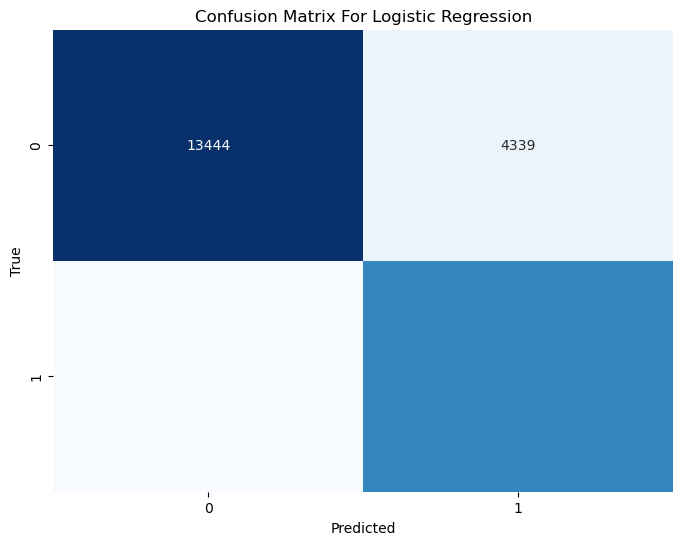

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

rounded_preds = np.round(val_preds)

# Calculate evaluation metrics
precision = precision_score(y_test, rounded_preds)
recall = recall_score(y_test, rounded_preds)
f1 = f1_score(y_test, rounded_preds)
conf_matrix = confusion_matrix(y_test, rounded_preds)

# Print the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Display confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()